In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [66]:
df = pd.read_csv('austin_crime.csv')

In [67]:
df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,longitude,primary_type,timestamp,unique_key,x_coordinate,y_coordinate,year,zipcode
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,NaN,Theft,2015-12-13 00:00:00,2.015505e+10,3113531.0,10079579.0,2015.0,78705.0
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,NaN,Theft,2015-09-03 00:00:00,2.015246e+10,3099459.0,10032098.0,2015.0,78748.0
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,-97.719647,Theft: Shoplifting,2014-04-04 00:00:00,2.014941e+09,3121345.0,10082705.0,2014.0,78751.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,-97.728709,Theft: All Other Larceny,2014-06-03 00:00:00,2.014502e+10,3119195.0,10048844.0,2014.0,78744.0
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,NaN,Theft,2015-12-30 00:00:00,2.015506e+10,3111397.0,10118845.0,2015.0,78759.0
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159462,Austin TX 78741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159464 entries, 0 to 159463
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   address                159464 non-null  object 
 1   census_tract           84528 non-null   object 
 2   clearance_date         81489 non-null   object 
 3   clearance_status       81480 non-null   object 
 4   council_district_code  84456 non-null   float64
 5   description            84884 non-null   object 
 6   district               84871 non-null   object 
 7   latitude               34500 non-null   float64
 8   location               34500 non-null   object 
 9   location_description   78172 non-null   object 
 10  longitude              34500 non-null   float64
 11  primary_type           79214 non-null   object 
 12  timestamp              73544 non-null   object 
 13  unique_key             73544 non-null   float64
 14  x_coordinate           72273 non-nul

# Question
1. ลักษณะการเกิดอาชญากรรมต่อพื้นที่
2. ความถี่ของอาชญากรรมเมื่ออิงจากสภาพเศษฐกิจ

In [69]:
latlong = df[pd.notnull(df['latitude'])].loc[pd.notnull(df['longitude'])][['latitude','longitude']]

In [70]:
latlong

,latitude,longitude
4,30.298356,-97.719647
9,30.272154,-97.730002
14,30.201243,-97.709249
17,30.271198,-97.705609
20,30.356418,-97.731423
...,...,...
159450,30.312239,-97.662693
159453,30.393536,-97.645133
159456,30.405797,-97.744910
159459,30.207396,-97.728709


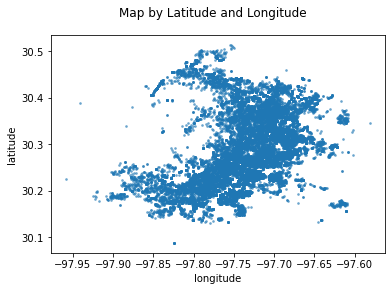

In [71]:
fig, ax = plt.subplots()
ax.scatter(latlong['longitude'].values, latlong['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

## แบ่งแยกลักษณะการเกิดอาชญากรรม ตามพื้นที่

In [72]:
df.description.unique()

array(['THEFT', 'THEFT BY SHOPLIFTING', nan, 'BURGLARY OF VEHICLE',
       'AUTO THEFT', 'BURGLARY NON RESIDENCE', 'THEFT FROM BUILDING',
       'AGG ASLT STRANGLE/SUFFOCATE', '2014', 'THEFT OF BICYCLE',
       'BURGLARY OF RESIDENCE', 'AGG ASSAULT FAM/DATE VIOLENCE',
       'THEFT OF LICENSE PLATE', 'THEFT OF VEHICLE/OTHER', 'AGG ASSAULT',
       'THEFT FROM AUTO', 'RAPE', 'THEFT FROM PERSON',
       'ROBBERY BY ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'THEFT OF AUTO PARTS', 'ROBBERY BY THREAT',
       'AGG ASLT ENHANC STRANGL/SUFFOC', 'THEFT OF HEAVY EQUIPMENT',
       'BURGLARY OF COIN-OP MACHINE', 'BURG NON RESIDENCE SHEDS',
       'THEFT OF METAL', 'MISAPPLY FIDUCIARY PROP', 'DEADLY CONDUCT',
       'RAPE OF A CHILD', 'AGG RAPE OF A CHILD', 'AGG RAPE',
       'TAKE WEAPON FRM POLICE OFFICER', 'BREACH OF COMPUTER SECURITY',
       'AGG ASSAULT WITH MOTOR VEH', 'AGG ASLT W/MOTOR VEH FAM/DAT V',
       'AGG ROBBERY BY ASSAULT', 'MANSLAUGHTER',
       'BURG OF RES - SEXUAL NATURE

In [73]:
df['Type1'] = df.apply(lambda x: 'THEFT' in str(x['description']),axis=1)

In [74]:
df.loc[df['Type1']].description.unique()

array(['THEFT', 'THEFT BY SHOPLIFTING', 'AUTO THEFT',
       'THEFT FROM BUILDING', 'THEFT OF BICYCLE',
       'THEFT OF LICENSE PLATE', 'THEFT OF VEHICLE/OTHER',
       'THEFT FROM AUTO', 'THEFT FROM PERSON', 'THEFT OF AUTO PARTS',
       'THEFT OF HEAVY EQUIPMENT', 'THEFT OF METAL',
       'THEFT CATALYTIC CONVERTER', 'THEFT/TILL TAPPING'], dtype=object)

In [75]:
df['Type2'] = df.apply(lambda x: 'BURG' in str(x['description']),axis=1)

In [76]:
df.loc[df['Type2']].description.unique()

array(['BURGLARY OF VEHICLE', 'BURGLARY NON RESIDENCE',
       'BURGLARY OF RESIDENCE', 'BURGLARY OF COIN-OP MACHINE',
       'BURG NON RESIDENCE SHEDS', 'BURG OF RES - SEXUAL NATURE'],
      dtype=object)

In [77]:
df['Type3'] = df.apply(lambda x: 'AGG' in str(x['description']),axis=1)

In [78]:
df.loc[df['Type3']].description.unique()

array(['AGG ASLT STRANGLE/SUFFOCATE', 'AGG ASSAULT FAM/DATE VIOLENCE',
       'AGG ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'AGG ASLT ENHANC STRANGL/SUFFOC', 'AGG RAPE OF A CHILD',
       'AGG RAPE', 'AGG ASSAULT WITH MOTOR VEH',
       'AGG ASLT W/MOTOR VEH FAM/DAT V', 'AGG ROBBERY BY ASSAULT',
       'AGG ASSAULT ON PUBLIC SERVANT'], dtype=object)

In [79]:
df['Type4'] = df.apply(lambda x: 'MURDER' in str(x['description']),axis=1)

In [80]:
df.loc[df['Type4']].description.unique()

array(['CAPITAL MURDER', 'MURDER'], dtype=object)

In [81]:
df['Type5'] = df.apply(lambda x: 'RAPE' in str(x['description']),axis=1)

In [82]:
df.loc[df['Type5']].description.unique()

array(['RAPE', 'RAPE OF A CHILD', 'AGG RAPE OF A CHILD', 'AGG RAPE'],
      dtype=object)

In [83]:
df['Type6'] = df.apply(lambda x: 'ROB' in str(x['description']),axis=1)

In [84]:
df.loc[df['Type6']].description.unique()

array(['ROBBERY BY ASSAULT', 'AGG ROBBERY/DEADLY WEAPON',
       'ROBBERY BY THREAT', 'AGG ROBBERY BY ASSAULT'], dtype=object)

In [85]:
df.loc[~df['Type6']].loc[~df['Type5']].loc[~df['Type4']].loc[~df['Type3']].loc[~df['Type2']].loc[~df['Type1']].description.unique()

array([nan, '2014', 'MISAPPLY FIDUCIARY PROP', 'DEADLY CONDUCT',
       'TAKE WEAPON FRM POLICE OFFICER', 'BREACH OF COMPUTER SECURITY',
       'MANSLAUGHTER', 'PURSE SNATCHING', 'DEADLY CONDUCT FAM/DATE VIOL',
       'AIRPORT - BREACH OF SECURITY'], dtype=object)

In [87]:
df

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6,color
0,2620 RIO GRANDE ST Austin TX 78705,6.03,2015-12-14 00:00:00,Not cleared,9.0,THEFT,B,NaN,NaN,2620 RIO GRANDE ST,...,10079579.0,2015.0,78705.0,True,False,False,False,False,False,red
1,9500 S IH 35 SVRD SB Austin TX 78748,24.21,2015-09-14 00:00:00,Cleared by Arrest,5.0,THEFT BY SHOPLIFTING,F,NaN,NaN,9500 S IH 35 SVRD SB,...,10032098.0,2015.0,78748.0,True,False,False,False,False,False,red
2,1000 E 41ST ST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,blue
3,Austin TX 78751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,blue
4,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,10082705.0,2014.0,78751.0,True,False,False,False,False,False,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159459,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,10048844.0,2014.0,78744.0,True,False,False,False,False,False,red
159460,10713 JOLLYVILLE RD Austin TX 78759,17.22,2016-01-12 00:00:00,Not cleared,10.0,THEFT BY SHOPLIFTING,A,NaN,NaN,10713 JOLLYVILLE RD,...,10118845.0,2015.0,78759.0,True,False,False,False,False,False,red
159461,1712 TIMBER RIDGE DR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,blue
159462,Austin TX 78741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,False,False,False,False,blue


In [88]:
df_t1 = df.loc[df['Type1']].reset_index(drop=True)
df_t2 = df.loc[df['Type2']].reset_index(drop=True)
df_t3 = df.loc[df['Type3']].reset_index(drop=True)
df_t4 = df.loc[df['Type4']].reset_index(drop=True)
df_t5 = df.loc[df['Type5']].reset_index(drop=True)
df_t6 = df.loc[df['Type6']].reset_index(drop=True)
df_t7 = df.loc[~df['Type6']].loc[~df['Type5']].loc[~df['Type4']].\
loc[~df['Type3']].loc[~df['Type2']].loc[~df['Type1']].reset_index(drop=True)

In [89]:
df_latlong_t1 = df_t1[pd.notnull(df_t1['longitude'])].loc[pd.notnull(df_t1['latitude'])]
df_latlong_t1

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6,color
2,(30.298356 -97.719647),3.02,2014-07-29 00:00:00,Cleared by Arrest,9.0,THEFT BY SHOPLIFTING,B,30.298356,(30.298356-97.719647),1000 E 41ST ST,...,10082705.0,2014.0,78751.0,True,False,False,False,False,False,red
4,(30.272154 -97.730002),8.029999999999999,2014-05-08 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.272154,(30.272154-97.730002),1000 E 12TH ST,...,10072414.0,2014.0,78702.0,True,False,False,False,False,False,red
6,(30.201243 -97.709249),24.31,2014-05-09 00:00:00,Not cleared,2.0,THEFT,H,30.201243,(30.201243-97.709249),6800 BURLESON RD,...,10047276.0,2014.0,78744.0,True,False,False,False,False,False,red
7,(30.271198 -97.705609),8.02,2014-12-19 00:00:00,Not cleared,1.0,AUTO THEFT,C,30.271198,(30.271198-97.705609),3506 WEBBERVILLE RD,...,10072207.0,2014.0,78702.0,True,False,False,False,False,False,red
8,(30.356418 -97.731423),18.170000000000002,2014-04-17 00:00:00,Not cleared,7.0,THEFT,B,30.356418,(30.356418-97.731423),2438 W ANDERSON LN,...,10103211.0,2014.0,78757.0,True,False,False,False,False,False,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42016,(30.38253 -97.714384),18.21,2014-10-20 00:00:00,Not cleared,4.0,THEFT,E,30.382530,(30.38253-97.714384),10300 METRIC BLVD,...,10112742.0,2014.0,78758.0,True,False,False,False,False,False,red
42019,(30.312239 -97.662693),22.01,2014-12-05 00:00:00,Not cleared,1.0,THEFT,C,30.312239,(30.312239-97.662693),7112 ED BLUESTEIN BLVD NB,...,10088360.0,2014.0,78724.0,True,False,False,False,False,False,red
42020,(30.393536 -97.645133),18.39,2014-03-27 00:00:00,Not cleared,7.0,THEFT,E,30.393536,(30.393536-97.645133),12600 DESSAU RD,...,10117185.0,2014.0,78753.0,True,False,False,False,False,False,red
42021,(30.207396 -97.728709),24.31,2014-06-04 00:00:00,Not cleared,2.0,THEFT OF METAL,F,30.207396,(30.207396-97.728709),4000 CAVEN RD,...,10048844.0,2014.0,78744.0,True,False,False,False,False,False,red


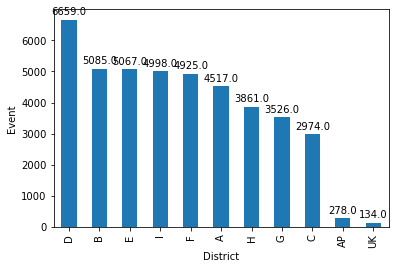

In [90]:
district_values = pd.value_counts(df_t1['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.show()

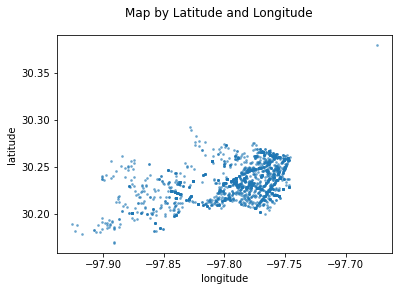

In [96]:
max_theft = df_t1.loc[df_t1['district'] == 'D']
fig, ax = plt.subplots()
ax.scatter(max_theft['longitude'].values, max_theft['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [123]:
df['color1'] = df.apply(lambda x:'red' if x['Type1'] == True and x['district'] == 'D' else 'skyblue',axis=1)

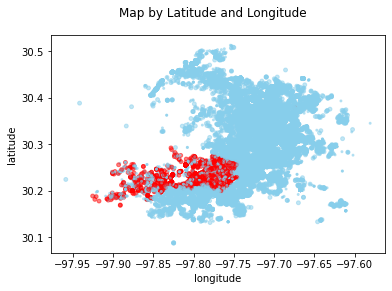

In [124]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=3+ pow(12,df['Type1'].astype('int')), c=df.color1, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

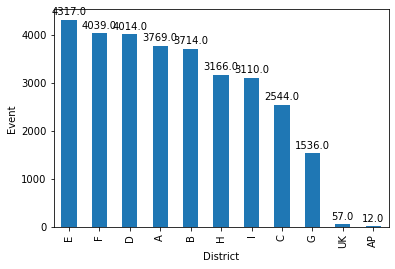

In [93]:
district_values =pd.value_counts(df_t2['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

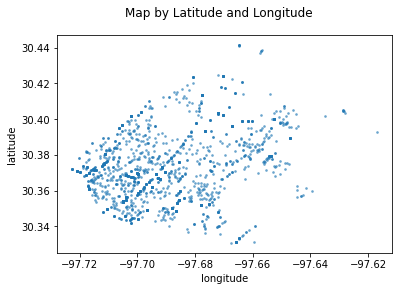

In [37]:
max_burg = df_t2.loc[df_t2['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_burg['longitude'].values, max_burg['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [125]:
df['color2'] = df.apply(lambda x:'red' if x['Type2'] == True and x['district'] == 'E' else 'skyblue',axis=1)

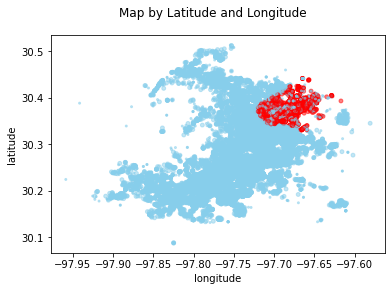

In [126]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=3+ pow(12,df['Type2'].astype('int')), c=df.color2, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

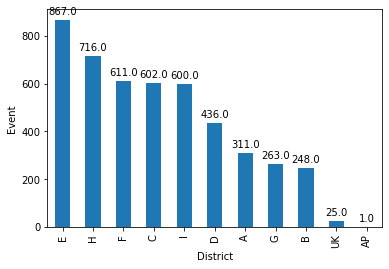

In [38]:
district_values =pd.value_counts(df_t3['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

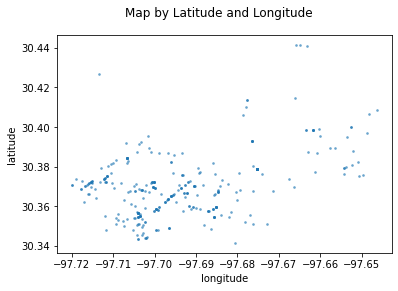

In [39]:
max_agg= df_t3.loc[df_t3['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_agg['longitude'].values, max_agg['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [127]:
df['color3'] = df.apply(lambda x:'red' if x['Type3'] == True and x['district'] == 'E' else 'skyblue',axis=1)

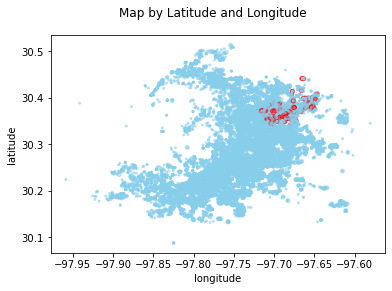

In [128]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=3+ pow(12,df['Type3'].astype('int')), c=df.color3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

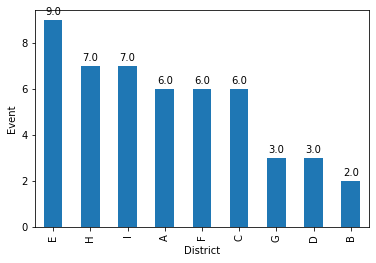

In [40]:
district_values =pd.value_counts(df_t4['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

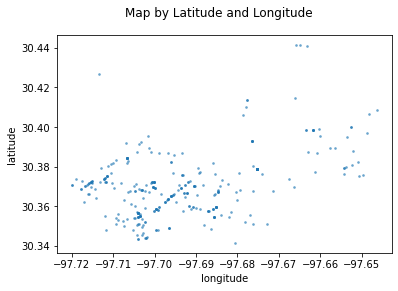

In [41]:
max_mur = df_t4.loc[df_t4['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_agg['longitude'].values, max_agg['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [112]:
df.loc[df['Type4']==True].loc[df['district'] == 'E']

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6,color
19377,8800 N IH 35 SVRD SB Austin TX 78753,18.059999999999999,2015-01-29 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,8800 N IH 35 SVRD SB,...,10101734.0,2015.0,78753.0,False,False,False,True,False,False,red
20496,(30.359502 -97.68525),18.329999999999998,2014-12-12 00:00:00,Not cleared,4.0,MURDER,E,30.359502,(30.359502-97.68525),9601 MIDDLE FISKVILLE RD,...,10104394.0,2014.0,78753.0,False,False,False,True,False,False,red
27897,Austin TX 78753,18.059999999999999,2014-07-21 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,9220 N IH 35 SVRD SB,...,10103687.0,2014.0,78753.0,False,False,False,True,False,False,red
36479,8500 E US 290 HWY SVRD WB Austin TX 78754,18.34,NaN,NaN,1.0,MURDER,E,NaN,NaN,8500 E US 290 HWY SVRD WB,...,10093394.0,2015.0,78754.0,False,False,False,True,False,False,red
49613,7800 N IH 35 SVRD SB Austin TX 78753,18.04,2016-03-15 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,7800 N IH 35 SVRD SB,...,10097584.0,2015.0,78753.0,False,False,False,True,False,False,red
57874,(30.347704 -97.70352),18.059999999999999,2014-11-10 00:00:00,Cleared by Arrest,4.0,MURDER,E,30.347704,(30.347704-97.70352),102 W POWELL LN,...,10100114.0,2014.0,78753.0,False,False,False,True,False,False,red
110731,309 DEEN AVE Austin TX 78753,18.059999999999999,2015-03-17 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,309 DEEN AVE,...,10102585.0,2015.0,78753.0,False,False,False,True,False,False,red
133284,(30.351112 -97.700746),18.059999999999999,2014-12-09 00:00:00,Cleared by Arrest,4.0,MURDER,E,30.351112,(30.351112-97.700746),8500 GEORGIAN DR,...,10101318.0,2014.0,78753.0,False,False,False,True,False,False,red
154000,1735 RUTLAND DR Austin TX 78758,18.2,2015-04-03 00:00:00,Cleared by Arrest,4.0,MURDER,E,NaN,NaN,1735 RUTLAND DR,...,10110594.0,2015.0,78758.0,False,False,False,True,False,False,red


In [130]:
df['color4'] = df.apply(lambda x:'red' if x['Type4'] == True and x['district'] == 'E' else 'skyblue',axis=1)

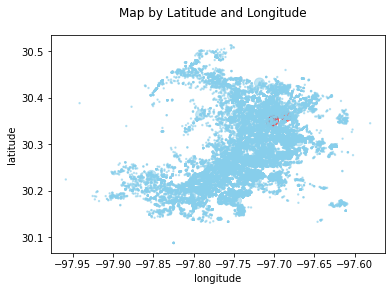

In [133]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=1+ pow(100,df['Type4'].astype('int')), c=df.color4, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

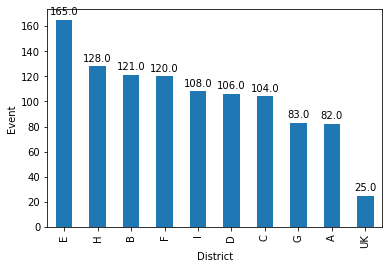

In [42]:
district_values =pd.value_counts(df_t5['district'])
plots =district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

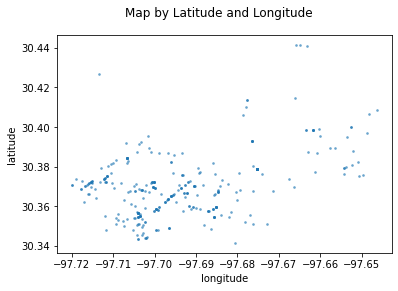

In [43]:
max_rape = df_t5.loc[df_t5['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_agg['longitude'].values, max_agg['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [134]:
df['color5'] = df.apply(lambda x:'red' if x['Type5'] == True and x['district'] == 'E' else 'skyblue',axis=1)

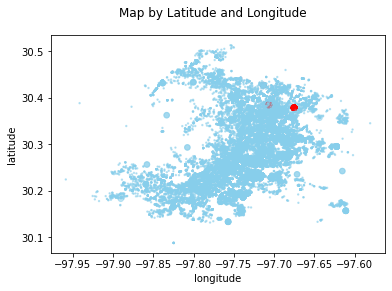

In [136]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=1+ pow(30,df['Type5'].astype('int')), c=df.color5, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

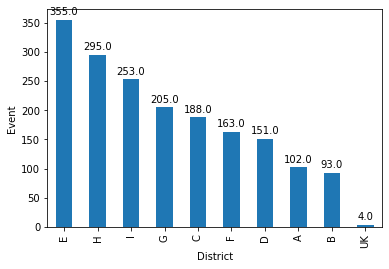

In [44]:
district_values =pd.value_counts(df_t6['district'])
plots = district_values.plot(kind="bar")
_=plt.xlabel('District')
_=plt.ylabel('Event')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.1f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

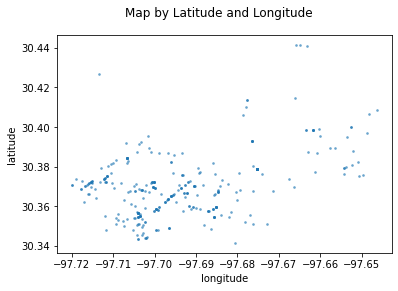

In [45]:
max_rob = df_t6.loc[df_t6['district'] == 'E']
fig, ax = plt.subplots()
ax.scatter(max_agg['longitude'].values, max_agg['latitude'].values,
             s=3, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [137]:
df['color6'] = df.apply(lambda x:'red' if x['Type6'] == True and x['district'] == 'E' else 'skyblue',axis=1)

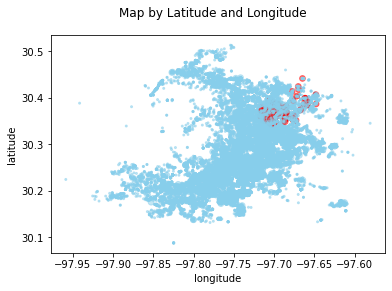

In [138]:
fig, ax = plt.subplots()
ax.scatter(df['longitude'].values, df['latitude'].values,
             s=3+ pow(30,df['Type6'].astype('int')), c=df.color6, label='map', alpha=0.5)
fig.suptitle('Map by Latitude and Longitude')

ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

plt.show()

In [46]:
df['clearance_date'] = pd.to_datetime(df['clearance_date'],errors='coerce')

In [47]:
df_2014= df[pd.notnull(df['clearance_date'])].loc[df.clearance_date.dt.year == 2014]

In [48]:
df_2015= df[pd.notnull(df['clearance_date'])].loc[df.clearance_date.dt.year == 2015]

In [49]:
df_2016= df[pd.notnull(df['clearance_date'])].loc[df.clearance_date.dt.year == 2016]

In [50]:
df[pd.notnull(df['clearance_date'])].loc[df.clearance_date.dt.year == 2017]

,address,census_tract,clearance_date,clearance_status,council_district_code,description,district,latitude,location,location_description,...,y_coordinate,year,zipcode,Type1,Type2,Type3,Type4,Type5,Type6,color


U.S. Bureau of Economic Analysis, Gross Domestic Product: All Industry Total in Texas [TXNGSP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/TXNGSP, October 13, 2022.

In [51]:
gdp = pd.read_csv('TXNGSP.csv')
gdp

,DATE,TXNGSP
0,1997-01-01,610157.3
1,1998-01-01,645142.6
2,1999-01-01,679870.3
3,2000-01-01,738677.0
4,2001-01-01,773375.5
5,2002-01-01,789817.6
6,2003-01-01,833342.3
7,2004-01-01,913444.4
8,2005-01-01,995252.4
9,2006-01-01,1103197.6


In [52]:
gdp['DATE'] = pd.to_datetime(gdp['DATE'] )

In [53]:
scope = gdp[gdp['DATE'].dt.year > 2013].loc[gdp['DATE'].dt.year < 2017].reset_index(drop=True)

In [54]:
num_2014=  df_2014.loc[pd.notnull(df_2014['description'])].drop_duplicates().description.count()
num_2015=  df_2015.loc[pd.notnull(df_2015['description'])].drop_duplicates().description.count()
num_2016=  df_2016.loc[pd.notnull(df_2016['description'])].drop_duplicates().description.count()

In [55]:
scope['CRIME_SUM'] = [num_2014,num_2015,num_2016]

In [56]:
scope

,DATE,TXNGSP,CRIME_SUM
0,2014-01-01,1579299.5,37060
1,2015-01-01,1573498.4,36804
2,2016-01-01,1579014.9,1858


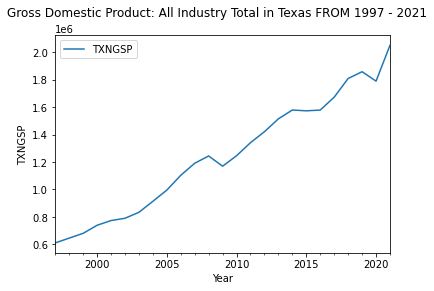

In [57]:
gdp.plot(x='DATE',y='TXNGSP')
plt.suptitle('Gross Domestic Product: All Industry Total in Texas FROM 1997 - 2021')
_=plt.xlabel('Year')
_=plt.ylabel('TXNGSP')

plt.show()


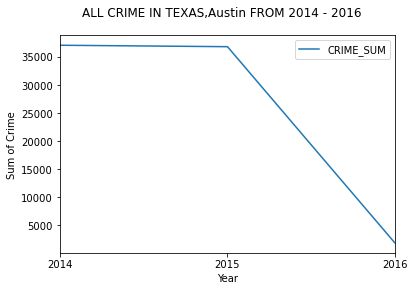

In [58]:
scope.plot(x="DATE", y="CRIME_SUM")
plt.suptitle('ALL CRIME IN TEXAS,Austin FROM 2014 - 2016')
_=plt.xlabel('Year')
_=plt.ylabel('Sum of Crime')
plt.show()